In [9]:
import warnings
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns


In [3]:
def standardize(df1):
    scaler = StandardScaler()
    df1 = scaler.fit_transform(df1)
    return pd.DataFrame(df1)


# PCA

In [13]:
def pca_func(data, n):
    pca = PCA(n_components=n, svd_solver='full')

    pca = pca.fit(data)
    df_pca = pca.transform(data)
    df_new = pca.inverse_transform(df_pca)
    # ref: https://blogs.sas.com/content/iml/2019/11/04/interpret-graphs-principal-components.html

    print('Components Explained Variance:', pca.explained_variance_ratio_*100)
    print('Total variance explained:', np.sum(
        pca.explained_variance_ratio_*100))
    print('Components:')
    print(pca.components_)
    plt.plot(np.linspace(0, pca.n_components_, pca.n_components_),
             pca.explained_variance_ratio_*100, ':o', color='k')
    plt.plot(np.linspace(0, pca.n_components_, pca.n_components_), np.cumsum(
        pca.explained_variance_ratio_*100), '--*', label='Cumulative', color='cyan')
    plt.xlabel('Principal components')
    plt.ylabel('Explained Variance Percentage')
    plt.title('Explained variance wrt principal components')
    plt.legend()
    plt.grid(True)

    # Calculate error
    rmse = mse(data, df_new, squared=False)
    print('RMSE between original and regained data after PCA: ', rmse)

    r2 = r2_score(data, df_new)

    print('R2_score between original and regained data after PCA: ', r2)


In [27]:
data_d = pd.read_csv('BoneCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('BoneCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('BoneCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('BoneCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('BoneCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('BoneCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')


In [28]:
data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')

data


,Name,Betweenness,Degree,Closeness,EigenValueC,Khatz,ClusteringCoef
0,4EBP1,0.001642,0.012245,0.333560,0.005237,0.000017,0.000000
1,AKT1,0.010165,0.063265,0.399348,0.052081,-0.044237,0.105376
2,CCND1,0.012930,0.048980,0.395480,0.027562,0.057587,0.137681
3,EIF4E,0.003454,0.018367,0.332654,0.004421,0.011429,0.027778
4,MAPK14,0.018317,0.067347,0.409699,0.038368,-0.057453,0.096591
...,...,...,...,...,...,...,...
486,USP9,0.000186,0.006122,0.294118,0.001032,0.009617,0.333333
487,UXT,0.000000,0.002041,0.240078,0.000082,0.003053,0.000000
488,YES,0.002251,0.024490,0.365945,0.045051,0.018259,0.575758
489,ZIN,0.000986,0.006122,0.326885,0.006081,-0.015272,0.000000


In [29]:
cols = ['Betweenness', 'Closeness', 'Degree', 'EigenValueC', 'Khatz', 'ClusteringCoef']
df_temp = data[cols]
df_temp = standardize(df_temp)


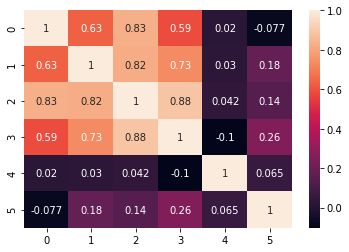

In [11]:
sns.heatmap(df_temp.corr(),annot=True)

Components Explained Variance: [55.06366031 17.99090413 16.62469335  5.2819784   4.55111885]
Total variance explained: 99.51235503071145
Components:
[[ 4.53848378e-01  4.82013676e-01  5.38943862e-01  5.04194075e-01
  -5.89044828e-02  1.16372574e-01]
 [ 3.61089251e-01 -1.19858152e-01  1.01073683e-01 -8.59872327e-02
   2.51649453e-01 -8.79949678e-01]
 [ 2.19903054e-02  6.12107972e-02 -8.75704301e-04 -2.94853211e-02
   9.58079069e-01  2.77459927e-01]
 [ 7.09642486e-01 -5.32957462e-01  3.39296297e-02 -2.61183371e-01
  -9.61569817e-02  3.65718125e-01]
 [-2.39550527e-01 -6.70216215e-01  1.87267638e-01  6.71938349e-01
   7.75606129e-02 -2.89794376e-02]]
RMSE between original and regained data after PCA:  0.050100206372853874
R2_score between original and regained data after PCA:  0.9951235503071145


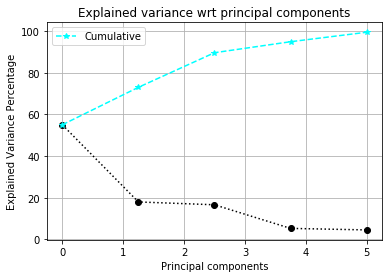

In [31]:
pca_func(df_temp, 5)

# Generating labels

In [24]:
original = pd.read_excel('list_for_classification_500.xlsx')
original_bone = original['BONE']
original_breast = original['BREAST']
original_liver = original['LIVER']
original_kidney = original['KIDNEY']
original_colon = original['COLON']

In [148]:
def get_labels(original_data,df,filename):
    labels = []
    for i in range(len(df)):
        if df['Name'][i] in original_data.to_list():
            labels.append(1)
        else:
            labels.append(0)
    labels = pd.DataFrame(labels, columns=['Label'])
    df = pd.concat([df, labels], axis=1)
    filename = ("LabelledData" + str(filename) + ".csv")
    df.to_csv(filename, index=False)

# Labelling files

In [159]:
data_d = pd.read_csv('BoneCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('BoneCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('BoneCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('BoneCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('BoneCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('BoneCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')
get_labels(original_bone,data,'\Bone-Cancer')


In [157]:
data_d = pd.read_csv('BreastCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('BreastCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('BreastCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('BreastCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('BreastCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('BreastCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')
get_labels(original_breast,data,'\Breast-Cancer')


In [154]:
data_d = pd.read_csv('LiverCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('LiverCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('LiverCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('LiverCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('LiverCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('LiverCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')
get_labels(original_liver,data,'\Liver-Cancer')


In [173]:
data_d = pd.read_csv('KidneyCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('KidneyCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('KidneyCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('KidneyCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('KidneyCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('KidneyCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')

get_labels(original_kidney,data,'\Kidney-Cancer')


In [174]:
data_d = pd.read_csv('ColonCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('ColonCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('ColonCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('ColonCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('ColonCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('ColonCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')

get_labels(original_colon,data,'\Colon-Cancer')


# Feature importance

In [175]:
def get_feature_importance_plots(data):
    X_train = data[data['Label'] == 1][['Betweenness', 'Degree','Closeness', 'EigenValueC', 'Khatz', 'ClusteringCoef']]
    y_train = data[data['Label'] == 1]['Label']
    count = len(y_train)
    X_train = X_train.append(data[data['Label'] == 0][['Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Khatz', 'ClusteringCoef']][:len(X_train)])
    y_train = y_train.append(data[data['Label'] == 0]['Label'][:len(y_train)])

    print('Number of common proteins',count)
    X_train_scaled = standardize(X_train)


    print('XGBoost Classifier')
    model = XGBClassifier()
    model.fit(X_train_scaled, y_train)
    importances = pd.DataFrame(data={
        'Attribute': X_train.columns,
        'Importance': model.feature_importances_
    })
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.bar(x=importances['Attribute'],
            height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=20)
    plt.xticks(rotation='vertical')
    plt.show()


    print('LogisticRegression Feature Importance')
    model = LogisticRegression()
    model.fit(X_train_scaled,y_train)
    importances = pd.DataFrame(data={
        'Attribute': X_train.columns,
        'Importance': model.coef_[0]
    })
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=20)
    plt.xticks(rotation='vertical')
    plt.show()
    # y_pred = model.predict(X_test)
    # accuracy_score(y_test,y_pred)


# Feature plots

Number of common proteins 39
XGBoost Classifier


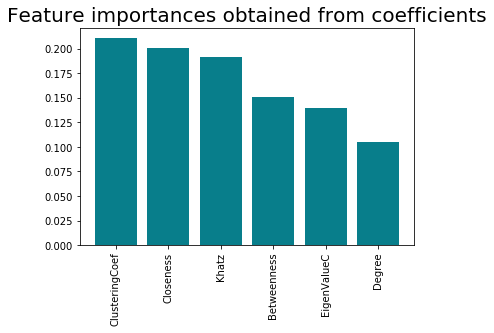

LogisticRegression Feature Importance


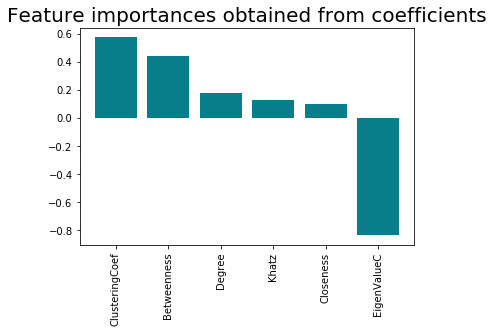

In [176]:
data = pd.read_csv('LabelledData\Bone-Cancer.csv')
get_feature_importance_plots(data)

Number of common proteins 92
XGBoost Classifier


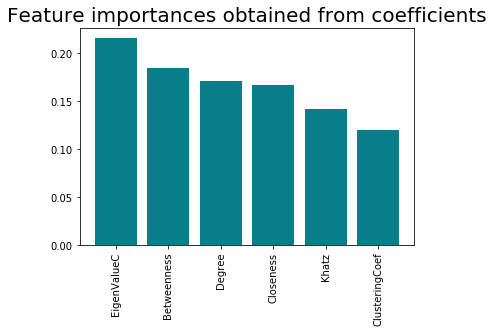

LogisticRegression Feature Importance


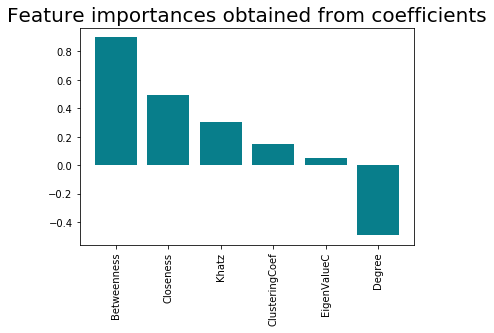

In [177]:
data = pd.read_csv('LabelledData\Breast-Cancer.csv')
get_feature_importance_plots(data)

Number of common proteins 86
XGBoost Classifier


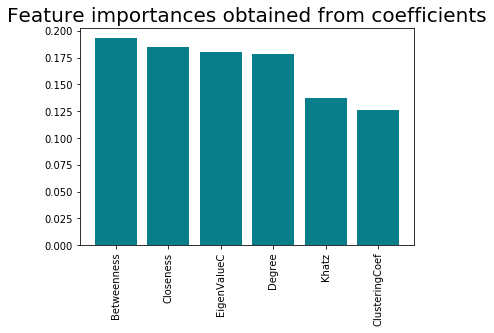

LogisticRegression Feature Importance


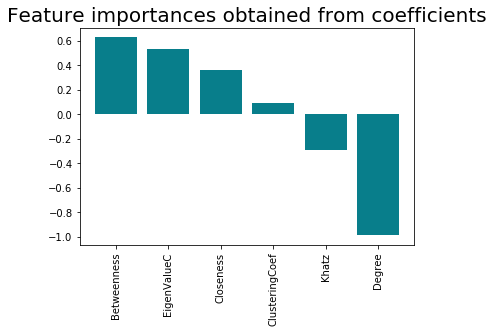

In [178]:
data = pd.read_csv('LabelledData\Liver-Cancer.csv')
get_feature_importance_plots(data)

Number of common proteins 70
XGBoost Classifier


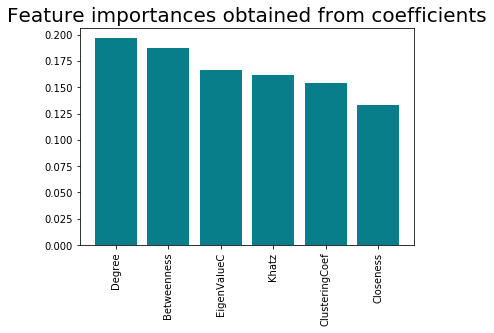

LogisticRegression Feature Importance


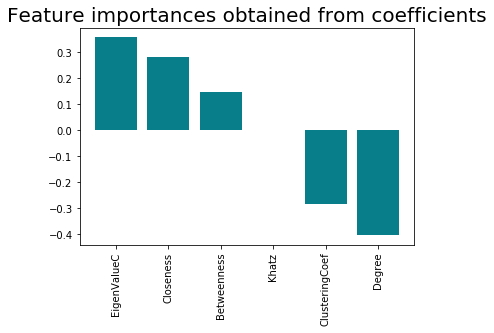

In [179]:
data = pd.read_csv('LabelledData\Kidney-Cancer.csv')
get_feature_importance_plots(data)

Number of common proteins 84
XGBoost Classifier


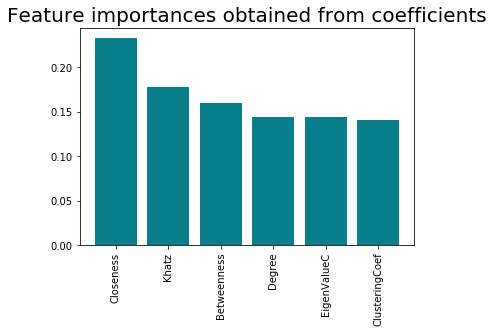

LogisticRegression Feature Importance


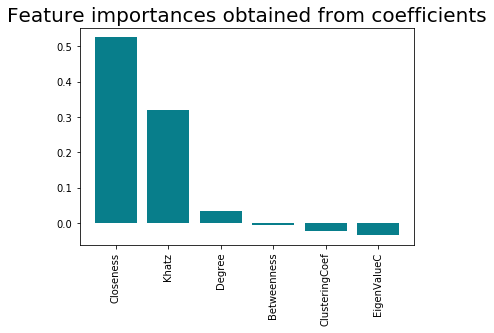

In [180]:
data = pd.read_csv('LabelledData\Colon-Cancer.csv')
get_feature_importance_plots(data)

# Overlap Count

In [185]:
def get_overlap(original_data,df):
    count = []
    temp_count=0
    for i in range(len(df)):
        if df['col1'][i] in original_data.to_list():
            temp_count+=1
        if i>0 and i%10==0:
            count.append(temp_count/i)
    return count

In [195]:
df = pd.read_csv('BoneCancer_degreeCentrality.csv')
df = df.sort_values(['col2'],ascending=False).reset_index().drop(columns=['index'],axis=1)
count_b = get_overlap(original_bone,df)

In [196]:
df = pd.read_csv('BreastCancer_degreeCentrality.csv')
df = df.sort_values(['col2'],ascending=False).reset_index().drop(columns=['index'],axis=1)
count_br = get_overlap(original_breast,df)
# plt.plot(np.arange(1,len(df),10),count)

In [197]:
df = pd.read_csv('ColonCancer_degreeCentrality.csv')
df = df.sort_values(['col2'],ascending=False).reset_index().drop(columns=['index'],axis=1)
count_c = get_overlap(original_colon,df)
# plt.plot(np.arange(1,len(df),10),count)

In [198]:
df = pd.read_csv('LiverCancer_degreeCentrality.csv')
df = df.sort_values(['col2'],ascending=False).reset_index().drop(columns=['index'],axis=1)
count_l = get_overlap(original_liver,df)
# plt.plot(np.arange(1,len(df),10),count)

In [199]:
df = pd.read_csv('KidneyCancer_degreeCentrality.csv')
df = df.sort_values(['col2'],ascending=False).reset_index().drop(columns=['index'],axis=1)
count_k = get_overlap(original_kidney,df)
# plt.plot(np.arange(1,len(df),10),count)

(0, 1)

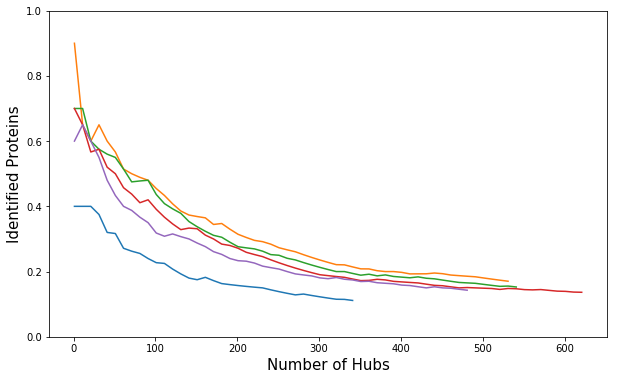

In [201]:
plt.figure(figsize=[10,6])
plt.plot(np.arange(1,len(count_b)*10,10),count_b)
plt.plot(np.arange(1,len(count_br)*10,10),count_br)
plt.plot(np.arange(1,len(count_c)*10,10),count_c)
plt.plot(np.arange(1,len(count_l)*10,10),count_l)
plt.plot(np.arange(1,len(count_k)*10,10),count_k)
plt.xlabel('Number of Hubs',fontsize=15)
plt.ylabel('Identified Proteins',fontsize=15)
plt.ylim(0,1)

# Verification

In [19]:
def get_normal_cancer(original_data,filename):
    df = pd.read_csv(filename)
    df = df.sort_values(['col2'],ascending=False).reset_index().drop(columns=['index'],axis=1)
    cancer_count=0
    normal_count=0
    count_n=0
    count_c=0
    for i in range(len(df)):
        if df['col1'][i] in original_data.to_list():
            cancer_count+=df['col2'][i]
            count_c+=1
        else:
            normal_count+=df['col2'][i]
            count_n+=1

    return cancer_count/count_c,normal_count/count_n


## Degree

In [170]:
cancer=[]
normal=[]

In [171]:
bone_c, bone_n = get_normal_cancer(original_bone,'BoneCancer_degreeCentrality.csv')
cancer.append(bone_c)
normal.append(bone_n)

In [172]:
breast_c, breast_n = get_normal_cancer(original_breast,'BreastCancer_degreeCentrality.csv')
cancer.append(breast_c)
normal.append(breast_n)

In [173]:
colon_c, colon_n = get_normal_cancer(original_colon,'ColonCancer_degreeCentrality.csv')
cancer.append(colon_c)
normal.append(colon_n)

In [174]:
liver_c, liver_n = get_normal_cancer(original_liver,'LiverCancer_degreeCentrality.csv')
cancer.append(liver_c)
normal.append(liver_n)

In [175]:
kidney_c, kidney_n = get_normal_cancer(original_kidney,'KidneyCancer_degreeCentrality.csv')
cancer.append(kidney_c)
normal.append(kidney_n)

Text(0, 0.5, 'Average Degree Centrality')

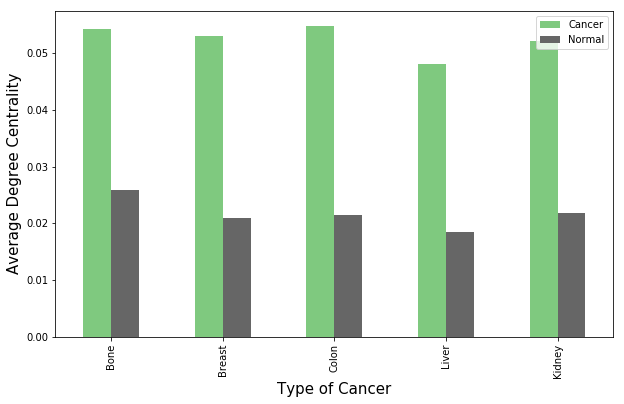

In [176]:
name=['Bone','Breast','Colon','Liver','Kidney']
df = pd.DataFrame(np.transpose([[0,1,2,3,4],cancer,normal]),columns=['Name','Cancer','Normal'])
ax = df.plot(x='Name', y=['Cancer','Normal'], kind="bar",figsize=[10,6],colormap='Accent')
ax.set_xticklabels(name)
ax.set_xlabel('Type of Cancer',fontsize=15)
ax.set_ylabel('Average Degree Centrality',fontsize=15)

## Betweenness

In [163]:
cancer=[]
normal=[]

In [164]:
bone_c, bone_n = get_normal_cancer(original_bone,'BoneCancer_betweennesssCentrality.csv')
cancer.append(bone_c)
normal.append(bone_n)

In [165]:
breast_c, breast_n = get_normal_cancer(original_breast,'BreastCancer_betweennesssCentrality.csv')
cancer.append(breast_c)
normal.append(breast_n)

In [166]:
colon_c, colon_n = get_normal_cancer(original_colon,'ColonCancer_betweennesssCentrality.csv')
cancer.append(colon_c)
normal.append(colon_n)

In [167]:
liver_c, liver_n = get_normal_cancer(original_liver,'LiverCancer_betweennesssCentrality.csv')
cancer.append(liver_c)
normal.append(liver_n)

In [168]:
kidney_c, kidney_n = get_normal_cancer(original_kidney,'KidneyCancer_betweennesssCentrality.csv')
cancer.append(kidney_c)
normal.append(kidney_n)

Text(0, 0.5, 'Average Betweenness Centrality')

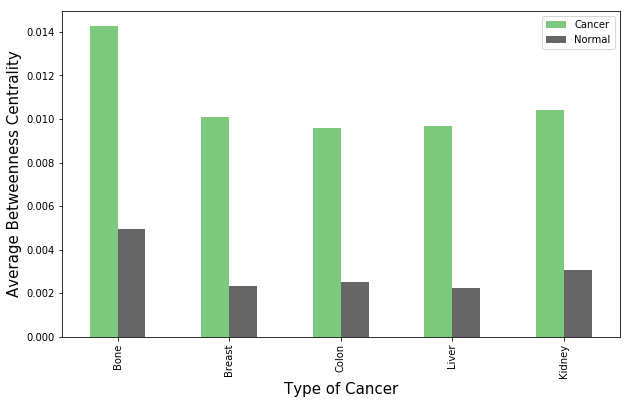

In [169]:
name=['Bone','Breast','Colon','Liver','Kidney']
df = pd.DataFrame(np.transpose([[0,1,2,3,4],cancer,normal]),columns=['Name','Cancer','Normal'])
ax = df.plot(x='Name', y=['Cancer','Normal'], kind="bar",figsize=[10,6],colormap='Accent')
ax.set_xticklabels(name)
ax.set_xlabel('Type of Cancer',fontsize=15)
ax.set_ylabel('Average Betweenness Centrality',fontsize=15)

## Clustering Coef

In [154]:
cancer=[]
normal=[]

In [155]:
bone_c, bone_n = get_normal_cancer(original_bone,'BoneCancer_clusteringCentrality.csv')
cancer.append(bone_c)
normal.append(bone_n)

In [156]:
breast_c, breast_n = get_normal_cancer(original_breast,'BreastCancer_clusteringCentrality.csv')
cancer.append(breast_c)
normal.append(breast_n)

In [157]:
colon_c, colon_n = get_normal_cancer(original_colon,'ColonCancer_clusteringCentrality.csv')
cancer.append(colon_c)
normal.append(colon_n)

In [158]:
liver_c, liver_n = get_normal_cancer(original_liver,'LiverCancer_clusteringCentrality.csv')
cancer.append(liver_c)
normal.append(liver_n)

In [159]:
kidney_c, kidney_n = get_normal_cancer(original_kidney,'KidneyCancer_clusteringCentrality.csv')
cancer.append(kidney_c)
normal.append(kidney_n)

Text(0, 0.5, 'Average Clustering Coefficient')

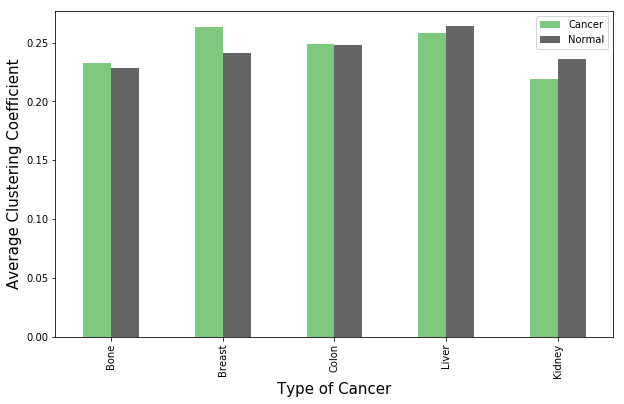

In [162]:
name=['Bone','Breast','Colon','Liver','Kidney']
df = pd.DataFrame(np.transpose([[0,1,2,3,4],cancer,normal]),columns=['Name','Cancer','Normal'])
ax = df.plot(x='Name', y=['Cancer','Normal'], kind="bar",figsize=[10,6],colormap='Accent')
ax.set_xticklabels(name)
ax.set_xlabel('Type of Cancer',fontsize=15)
ax.set_ylabel('Average Clustering Coefficient',fontsize=15)

## Closeness Centrality

In [177]:
cancer=[]
normal=[]

In [178]:
bone_c, bone_n = get_normal_cancer(original_bone,'BoneCancer_closenesscentrality.csv')
cancer.append(bone_c)
normal.append(bone_n)

In [179]:
breast_c, breast_n = get_normal_cancer(original_breast,'BreastCancer_closenesscentrality.csv')
cancer.append(breast_c)
normal.append(breast_n)

In [180]:
colon_c, colon_n = get_normal_cancer(original_colon,'ColonCancer_closenesscentrality.csv')
cancer.append(colon_c)
normal.append(colon_n)

In [181]:
liver_c, liver_n = get_normal_cancer(original_liver,'LiverCancer_closenesscentrality.csv')
cancer.append(liver_c)
normal.append(liver_n)

In [182]:
kidney_c, kidney_n = get_normal_cancer(original_kidney,'KidneyCancer_closenesscentrality.csv')
cancer.append(kidney_c)
normal.append(kidney_n)

Text(0, 0.5, 'Average Closeness Centrality')

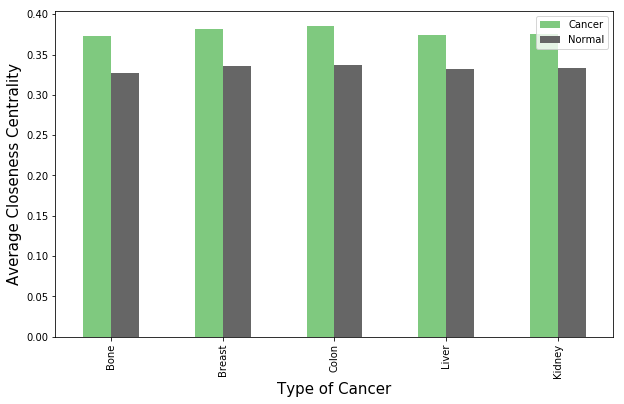

In [184]:
name=['Bone','Breast','Colon','Liver','Kidney']
df = pd.DataFrame(np.transpose([[0,1,2,3,4],cancer,normal]),columns=['Name','Cancer','Normal'])
ax = df.plot(x='Name', y=['Cancer','Normal'], kind="bar",figsize=[10,6],colormap='Accent')
ax.set_xticklabels(name)
ax.set_xlabel('Type of Cancer',fontsize=15)
ax.set_ylabel('Average Closeness Centrality',fontsize=15)

In [126]:
normal

[0.22858663939743598,
 0.24073658710025983,
 0.2480611870558765,
 0.2640039372699073,
 0.2362879077021282]

# Identified Proteins countplot

In [58]:
import seaborn as sns

Text(0, 0.5, '% of Proteins identified')

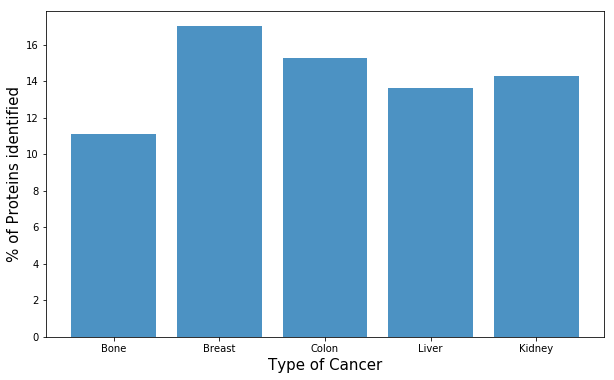

In [63]:
count=[]
bone = pd.read_csv('LabelledData/Bone-Cancer.csv')
breast = pd.read_csv('LabelledData/Breast-Cancer.csv')
liver =  pd.read_csv('LabelledData/Liver-Cancer.csv')
colon =  pd.read_csv('LabelledData/Colon-Cancer.csv')
kidney =  pd.read_csv('LabelledData/Kidney-Cancer.csv')
count.append(100*len(bone[bone['Label']==1])/len(bone))
count.append(100*len(breast[breast['Label']==1])/len(breast))
count.append(100*len(colon[colon['Label']==1])/len(colon))
count.append(100*len(liver[liver['Label']==1])/len(liver))
count.append(100*len(kidney[kidney['Label']==1])/len(kidney))

name=['Bone','Breast','Colon','Liver','Kidney']
plt.figure(figsize=[10,6])
plt.bar(name,count,alpha=0.8)
plt.xlabel('Type of Cancer',fontsize=15)
plt.ylabel('% of Proteins identified',fontsize=15)

# Degree table

In [207]:

import networkx as nx
import collections

In [236]:
def get_degree_list(filename):
    data = pd.read_csv(filename)
    graph = nx.Graph()
    for index,row in data.iterrows():
        graph.add_edges_from([(row['# Protein-1'],row['# Protein-2'])],weight = 1)
    temp = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(temp,columns=['Proteins','Value'])
    counts = [0,0,0,0]
    for i in df['Value']:
        if i>20:
            counts[3]+=1
        elif i>12:
            counts[2]+=1
        elif i>8:
            counts[1]+=1
        elif i>5:
            counts[0]+=1
    for i in np.arange(3,0,-1):
        # print(counts)
        counts[i-1]+=counts[i]
        
    return counts

In [237]:
count=[]
print('Bone Cancer:',get_degree_list('../data/Bone-Cancer.csv'))
print('Bone normal:',get_degree_list('../data/Bone-Normal.csv'))

print('Breast Cancer:',get_degree_list('../data/Breast-Cancer.csv'))
print('Breast normal:',get_degree_list('../data/Breast-Normal.csv'))

print('Colon Cancer:',get_degree_list('../data/Colon-Cancer.csv'))
print('Colon normal:',get_degree_list('../data/Colon-Normal.csv'))

print('Liver Cancer:',get_degree_list('../data/Liver-Cancer.csv'))
print('Liver normal:',get_degree_list('../data/Liver-Normal.csv'))

print('Kidney Cancer:',get_degree_list('../data/Kidney-Cancer.csv'))
print('Kidney normal:',get_degree_list('../data/Kidney-Normal.csv'))

Bone Cancer: [204, 150, 83, 43]
Bone normal: [71, 40, 26, 12]
Breast Cancer: [365, 291, 202, 108]
Breast normal: [188, 133, 79, 40]
Colon Cancer: [372, 302, 216, 111]
Colon normal: [181, 117, 75, 36]
Liver Cancer: [404, 310, 212, 115]
Liver normal: [151, 91, 58, 28]
Kidney Cancer: [324, 245, 156, 80]
Kidney normal: [159, 108, 60, 26]
